<a href="https://colab.research.google.com/github/a-eghrari/nb_LEARNER/blob/sol/8S50x_L17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 17: Numerical ODE Simulations Part I</h1>


<a name='section_17_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_1">L17.1 Simulating a Pendulum</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_1">L17.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_2">L17.2 The Symplectic Approach</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_2">L17.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_3">L17.3 The Leap-Frog Verlet Approach</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_3">L17.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_4">L17.4 Runge-Kutta</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_4">L17.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_5">L17.5 Modern High Quality Integrators</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_5">L17.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_17_6">L17.6 Fitting the Full Thing</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_17_6">L17.6 Exercises</a></td>
    </tr>
</table>

<h3>Learning Objectives</h3>

In this part of the course, we are going to cover numerical simulation, which is often the core of computational physics courses. However, as we will see, this part goes hand-in-hand with analyzing data. We will cover the core numerical simulations and projects that are present in a variety of fields, and we note that more and more subfields are adopting numerical simulations.

Before delving into modern physics, in this Lesson we will first go back to the 17th century to solve the most famous physics problem of them all: **The Pendulum**. We'll start with some of the traditional mathematical approachs but don't worry, by the end of this lecture we will be solving it with deep learning.

<h3>Slides</h3>

You can access the slides related to this lecture at the following link: <a href="https://github.com/mitx-8s50/slides/raw/main/module3_slides/L17_slides.pdf" target="_blank">L17 Slides</a>

<h3>Importing Data (Colab Only)</h3>

If you are in a Google Colab environment, run the cell below to import the data for this notebook. Otherwise, if you have downloaded the course repository, you do not have to run the cell below.

See the source and attribution information below:

>data: Kiran.csv, jade-pendulum.csv<br>
>source:  MIT Junior Lab<br>
>attribution: needed

In [19]:
#>>>RUN: L17.0-runcell00

#Importing data:

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L17' >> .git/info/sparse-checkout
!git pull origin main

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
From https://github.com/mitx-8s50/nb_LEARNER
 * branch            main       -> FETCH_HEAD
Already up to date.


<h3>Installing Tools</h3>

Before we do anything, let's make sure we install the tools we need.

In [20]:
#>>>RUN: L17.0-runcell01

!pip install lmfit

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [21]:
#>>>RUN: L17.0-runcell02

import imageio                        #https://imageio.readthedocs.io/en/stable/
from PIL import Image                 #https://pillow.readthedocs.io/en/stable/reference/Image.html

import numpy as np                    #https://numpy.org/doc/stable/
import torch                          #https://pytorch.org/docs/stable/torch.html
import torch.nn as nn                 #https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt       #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

from scipy.integrate import odeint    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
from scipy.optimize import minimize   #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
import csv                            #https://docs.python.org/3/library/csv.html
from matplotlib.patches import Circle #https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html
from scipy.integrate import solve_ivp #https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [22]:
#>>>RUN: L17.0-runcell03

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title

<a name='section_17_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.1 Simulating a Pendulum</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_0) | [Exercises](#exercises_17_1) | [Next Section](#section_17_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

A large variety of physics classes at many levels talk about the pendulum. This is that class. We can write the force for a pendulum without friction as:

$$
m \ell \ddot{\theta} = -m g\sin \theta
$$

where we have $\ddot{\theta}$ denotes the second time derivative of the angle of the pendulum given by $\theta(t)$, $\ell$ is the length of the pendulum, $m$ is its mass, and $g$ is the gravitational constant near the surface of the Earth.

Now, traditionally, this is simplified to a differential equation for the first time derivative of the angle $\dot{\theta}$ given by:

$$
\frac{d}{dt}\dot{\theta} = -\frac{g}{\ell}\sin \theta
$$

and then we take the small angle approximation $\theta \ll 1$ (for which $\sin \theta \approx \theta$) which gives us:

$$
\frac{d}{dt}\dot{\theta} = -\frac{g}{\ell} \theta
$$

and we know the solution to this equation is given by:

$$
\theta(t) = \theta_{0} \cos\left(\sqrt{\frac{g}{\ell}} t + \phi\right)
$$

where $\theta_{0}$ is the initial angle of the pendulum at time $t=0$, and the parameter $\phi$ depends on the initial angular velocity at $t=0$.

<h4>Numerical Stepper</h4>

However, in reality, this equation does not correspond exactly to what is going on. To see that, let's set up a simulation that computes the force, and steps forward.  We will do this in the most naive way possible, by just stepping and propagating.

To do that, we will define a step $\Delta t$, and then we will update our velocity and position at each step by noting

$$
\theta_{n+1} = \theta_{n} + \Delta t \dot{\theta}_{n}\\
\dot{\theta}_{n+1} = \dot{\theta}_{n} - \Delta t \frac{g}{\ell} \theta \\
$$

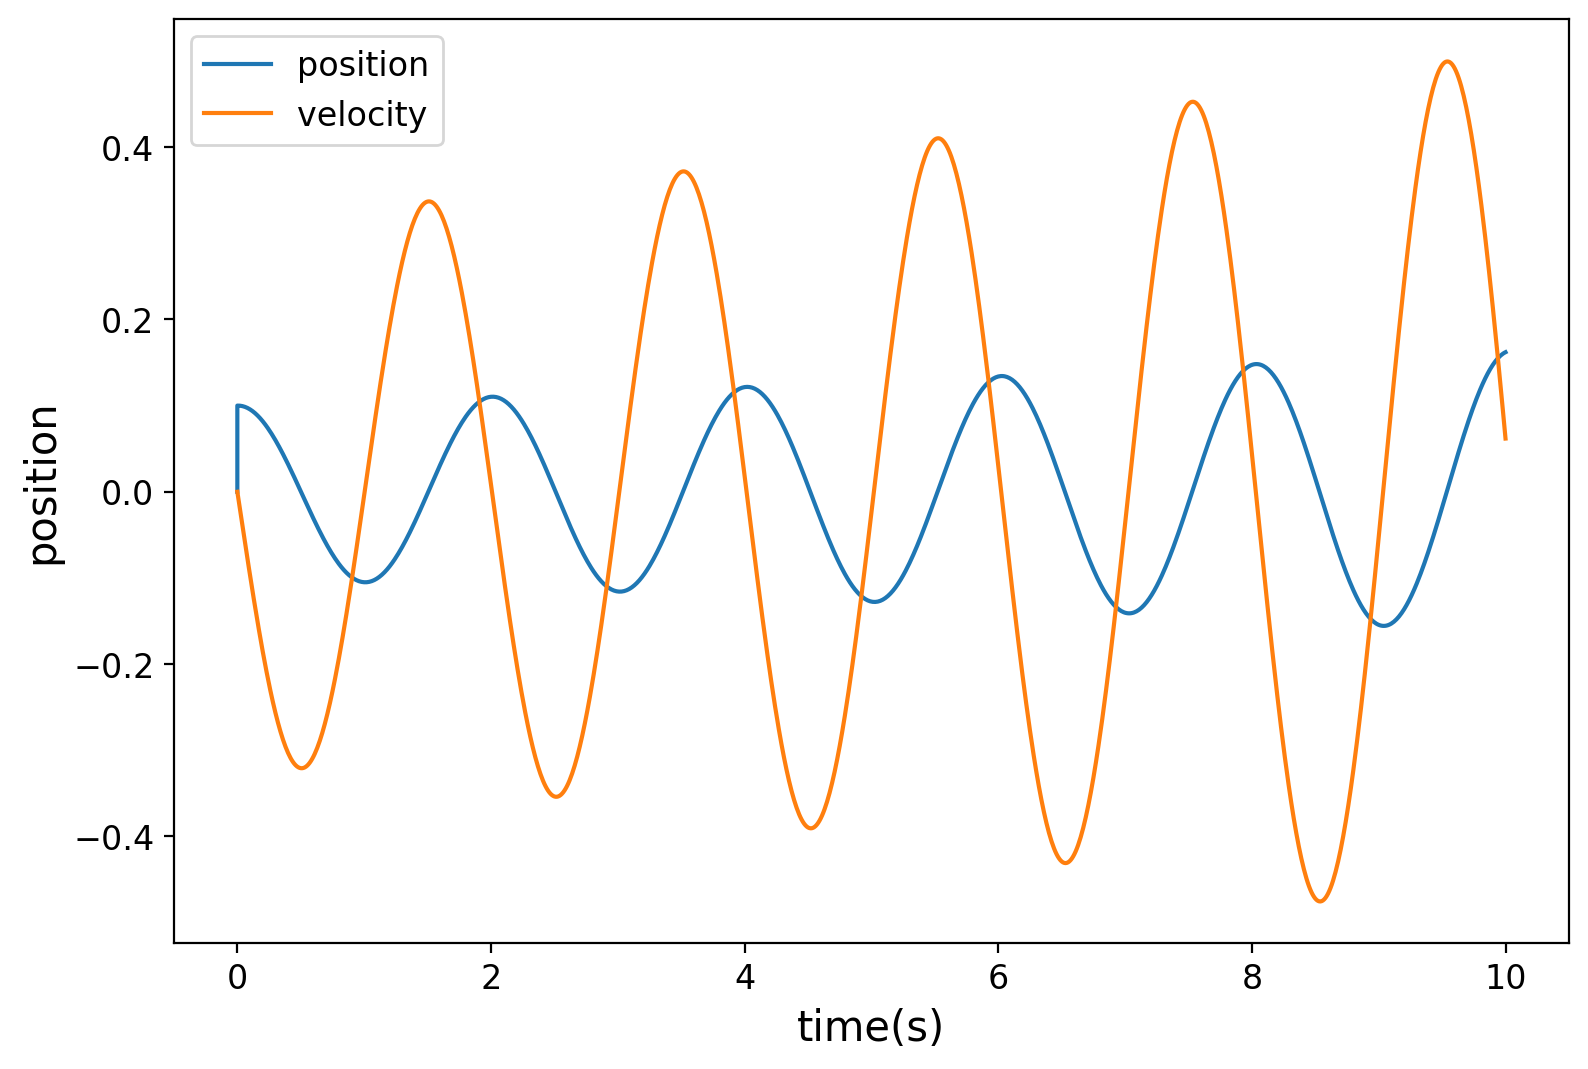

In [23]:
#>>>RUN: L17.1-runcell01

#theta[0]=x
#theta[1]=v

def step(theta,dt,g,l):
    theta_tmp  = theta[0]
    theta_vtmp = theta[1]
    theta[0] += theta_vtmp * dt
    theta[1] += (g/l)*(-1)*theta_tmp*dt

def store(theta,thetapos,time,timepos):
    thetapos = np.vstack((thetapos,theta))
    timepos  = np.vstack((timepos,time))
    return timepos,thetapos

def loop(istep, nsteps=10000,dt=0.01,g=9.8,l=1):
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = 0.1 #initial conditions
    theta[1] = 0.0
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        istep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos

timepos,thetapos=loop(step,nsteps=1000)

plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position")
plt.show()


Clearly, there is something wrong. Go ahead and run the simulation with 10,000 steps. What happens?

<h4>Energy</h4>

Now, we can go one step further and, in addition to the above, compute the total energy of the pendulum. Let's go ahead and do that. We can define the total energy as:

$$
\mathcal{H} = \frac{p^2}{2m} + V(\theta)\\
~ = \frac{1}{2}m\ell^{2}\dot{\theta}^{2} - mg\ell\cos(\theta)\\
~ = m\ell\left(\frac{1}{2}\ell\dot{\theta}^{2} - g\cos(\theta)\right)\\
$$

where $V(0)$ is the gravitational potential energy taking the zero of the potential at the point where the pendulum is at $90^{\circ}$.

<h4>About the Quantity $\mathcal{H}$</h4>

Note, we've written $\mathcal{H}$, which stands for Hamiltonian. The Hamiltonian is equal to the **total energy of the system** (kinetic + potential), and is a useful object to work with in physics. Although we will use some Hamiltonian formalism in what follows, a full exposition of the topic is beyond the scope of this class. However, we will briefly point out a few useful concepts and definitions, below.

**Generalized Coordinates:** The Hamiltonian can be expressed in terms of generalized coordinates $q$, and $p$, which represent position and momentum. For instance, in the example above, $q=\theta$ and $p_{\theta}=m\ell^2\dot{\theta}$. For small angles, we can express the Hamiltonian as:

$$
\mathcal{H} = \frac{p_{\theta}^2}{2m\ell^2} + \frac{m\ell g \theta^2}{2} - m\ell g
$$


**Relation Between Coordinates:** Derivatives of the Hamiltonian are related to derivatives of the generalized coordinates in the following way,


$$ \frac{\partial \mathcal{H} }{ \partial p_{i} } = \dot{q}_{i}$$

$$ \frac{\partial \mathcal{H} }{ \partial q_{i} } = -\dot{p}_{i} $$  

**Dimensionless Coordinates:** Sometimes it is easier to work in dimensionless coordinates, in which case the generalized Hamiltonian can more simply be expressed by the following (if we take the small-angle limit of the Hamiltonian above, and redefine the zero of the potential):

$$
\mathcal{H} = \frac{1}{2} q^2 + \frac{1}{2} p^2
$$


We will be working with $\mathcal{H}$, $q$, and $p$ more in the following sections. **Additionally, this will be covered in more detail in Lesson 19.**


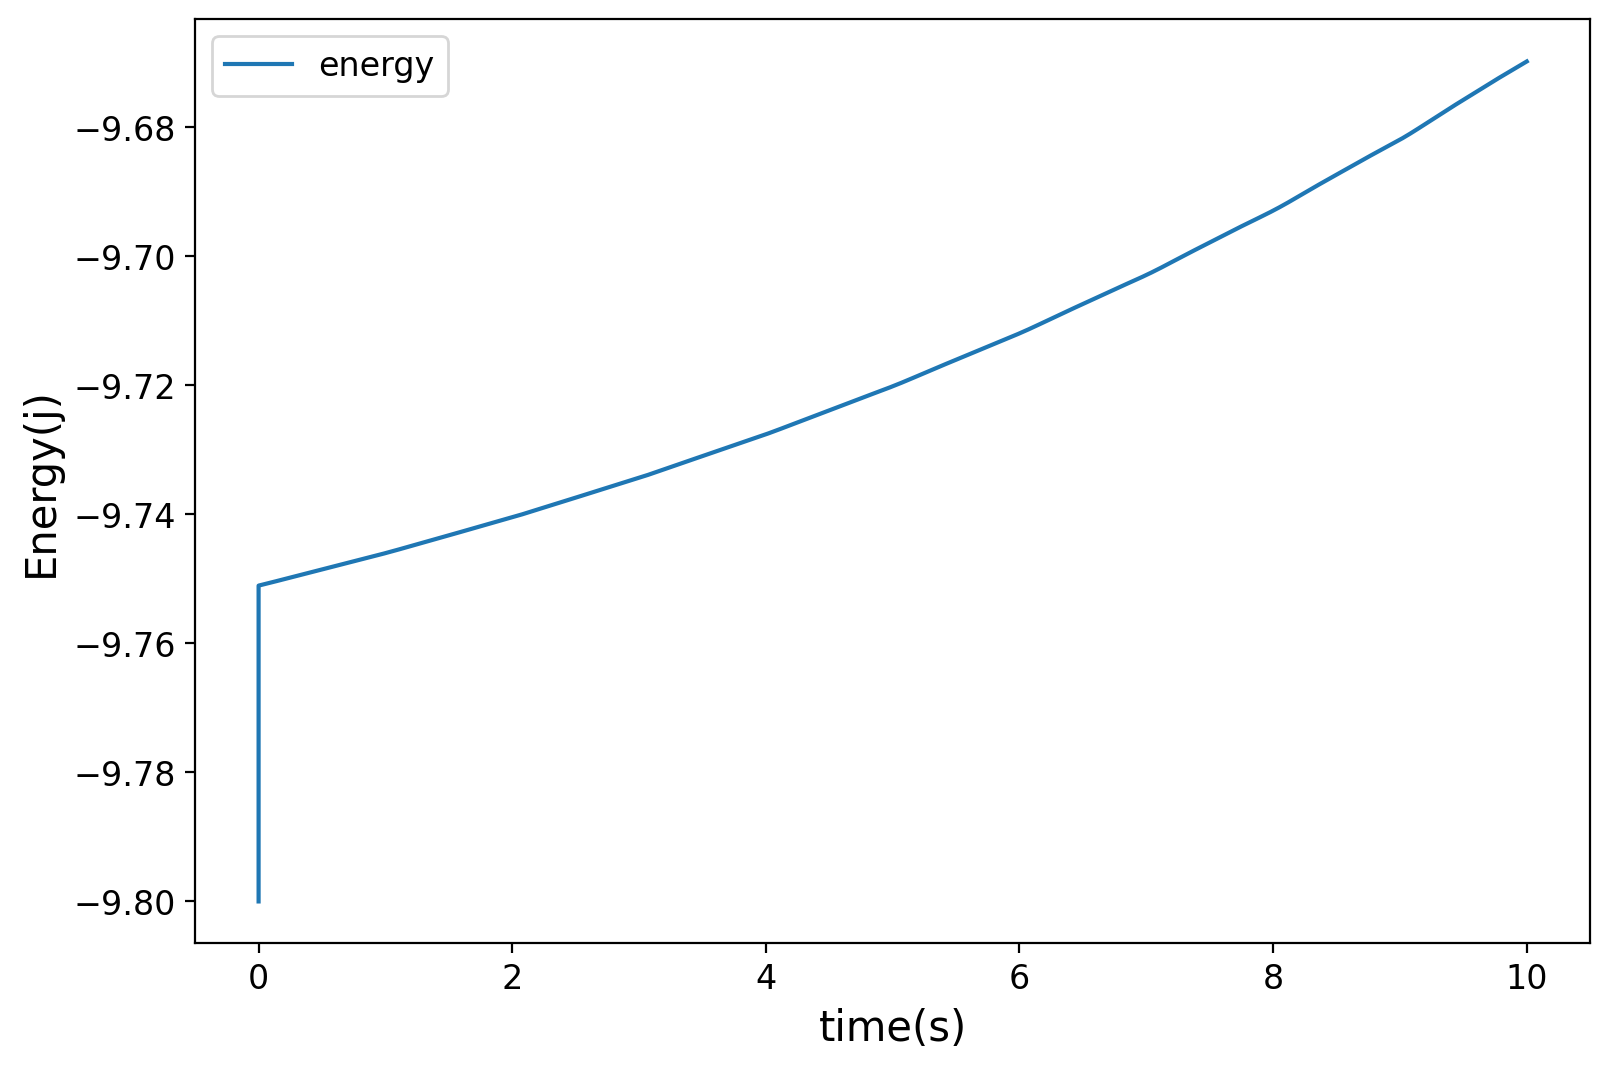

In [24]:
#>>>RUN: L17.1-runcell02

def energy(theta,g=9.8,l=1):
    kin=0.5*(l*theta[:,1])**2
    pot=-g*l*np.cos(theta[:,0])
    return kin+pot

epos = energy(thetapos)

plt.plot(timepos,epos,label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("Energy(j)")
plt.show()

We see that our energy is growing with time, clearly it is not conserved!

<a name='exercises_17_1'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_1) | [Next Section](#section_17_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.1.1</span>

Use the definitions for position and velocity shown below to explicitly compute the difference in energy for a step $\Delta t$. Specifically, calculate the difference in energy $\Delta \mathcal{H_{1}} = \mathcal{H_{1}}-\mathcal{H_{0}}$. Assume an initial angle of $\theta_0=0$ and a non-zero initial angular velocity $\dot{\theta}_0$.

$$
\theta_{n+1} = \theta_{n} + \Delta t \dot{\theta}_{n}\\
\dot{\theta}_{n+1} = \dot{\theta}_{n} - \Delta t \frac{g}{\ell} \theta \\
$$

Express your answer in terms of `m`, `g`, `l` for $\ell$, `Deltat` for $\Delta t$, and `thetadot_0` for $\dot{\theta}_0$. Make small angle approximations of any trig functions in your answer using the assumption that $\Delta t$ is very small.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.1.2</span>

Show that the total change in energy varies with $\Delta t$ when stepping over the same total period of time. To do this, consider two different step sizes `dt1=0.001` and `dt2=0.01` and a total time of $10$. Create a plot of energy versus time for these choices of step size. Make sure that you step your simulation over the same total time: $n_{\rm steps} \times \Delta t$.

To check your code, calculate the magnitude of the fractional difference in energy between the last element of the `dt1=0.001` computation and the last energy using the `dt2=0.01` step size, i.e.,:

$$\mathrm{frac\_diff} = \left|\frac{\mathcal{H_{final}}(dt2)-\mathcal{H_{final}}(dt1)}{\mathcal{H_{final}}(dt1)}\right|$$.

Enter your answer as a number with precision `1e-3`.


In [18]:
#>>>EXERCISE: L17.1.2

#keep time_total fixed
time_total = 10.

###################
#time-step 1:
dt1 = 0.001
nsteps1 = int(time_total/dt1)

timepos1,thetapos1=loop(step,nsteps=nsteps1,dt=dt1)
epos1 = energy(thetapos1)


###################
#time-step 2:
dt2 = 0.01
nsteps1 = int(time_total/dt2)

timepos2,thetapos2=loop(step,nsteps=nsteps1,dt=dt2)
epos2 = energy(thetapos2)

###################
#Make plots and compute
#fractional difference in energy

delta_H = epos2[-1] - epos1[-1]
print("frac_diff:", abs(delta_H/epos1[-1]))


#MAKE PLOTS

frac_diff: 0.007820441664855803


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.1.3</span>

Why is it important that energy is conserved in a numerical stepper?

A) Conserving energy ensures that the numerical solution accurately reflects the physical behavior of the system, providing realistic and meaningful results.

B) Energy conservation is often linked to the stability of the numerical method over long integration times, so methods that conserve energy are less likely to exhibit numerical artifacts or instability.

C) In systems with oscillatory motion, conserving energy helps maintain the correct frequency and amplitude of oscillations over time.

D) Deviations from energy conservation can lead to systematic errors in the solution.

E) Non-conservative methods may introduce unphysical damping or amplification, leading to incorrect results and potentially misleading interpretations of the system's behavior.

<a name='section_17_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.2 The Symplectic Approach</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_1) | [Exercises](#exercises_17_2) | [Next Section](#section_17_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

We can generalize the above to what we consider the "Symplectic" approach, which just follows Hamilton's equations (we refer to the previous section where the Hamiltonian formalism is introduced, and also suggest further reading if this topic is new). Here, the term "Symplectic" refers to a method of integration that solves Hamilton's equations and maintains a conserved quantity.

As we saw before, the change in position is defined as a derivative of the Hamiltonian with respect to momentum:

$$
\frac{\partial \mathcal{H} }{ \partial p_{i} } = \dot{q}_{i}
$$

and the derivative of the Hamiltonian with respect to position $q_{i}$ gives us the negative of the time derivative of momentum:

$$ \frac{\partial \mathcal{H} }{ \partial q_{i} } = -\dot{p}_{i} $$  

If we know what $p$ is, and if we know our force or potential, this governs everything.


<h4>A Generic Example</h4>

Solving for the motion through the Hamiltonian, while seemingly simple, can get progressively more complicated as we start to probe the finer details of what is going on. This is particularly true if we are trying to integrate complex formulae. Before we get to solving for motion in a specific physics problem, let's consider solving a more generic situation by writing:  

$$\frac{dx}{dt} = f(x,t) $$

The full solution of this problem would give us:

$$ \int dx = \int f(x,t) dt $$ or

$$ x(t)-x_0 = \int_{t_{0}}^{t} f(x,t) dt $$

where we have added the initial condition that, at some time $t_0$, $x(t_{0})=x_{0}$. The simplest way to integrate this guy is using Euler's method, which is just the inverse of a Taylor expansion, or a stepwise integration.

We can write this as:

$$x_{1}(t_{0}+\Delta t) = x_0 + f(t_{0},x_{0})\Delta t$$

Moreover, we can then step this integral using our knowledge of $f$ to write a recursive relation for $x(t)$ given by:

$$x_{n}(t) = x_{n-1} + f(t_{n-1},x_{n-1})\Delta t $$

This is known as Euler's method for first order differential equations. This is what we did in the previous section.

<h4>Second-Order Term</h4>

Now the second, more sophisticated, approach is to add a second order term namely:

$$x_{1}(\Delta t) = x_0 + f(t_{0},x_{0})\Delta t  + \frac{1}{2} \frac{df}{dt}(t_{0},x_{0})\Delta t^{2} $$

and recursively we can write:

$$x_{n}(t) = x_{n-1} + f(t_{n-1},x_{n-1})\Delta t  + \frac{1}{2} \frac{df}{dt}(t_{n-1},x_{n-1})\Delta t^{2} $$

Let's see how this works.


In [ ]:
#>>>RUN: L17.2-runcell01

def step(theta,dt,g,l):
    theta_tmp  = theta[0]
    theta_vtmp = theta[1]
    theta[0] += theta_vtmp * dt + 0.5*(g/l)*(-1)*np.sin(theta_tmp)*dt**2 #comment out higher-order term if desired
    theta[1] += (g/l)*(-1)*np.sin(theta_tmp)*dt
    #theta[1] += (g/l)*(-1)*theta_tmp*dt


def energy(theta,g=9.8,l=1):
    kin=0.5*l*l*theta[:,1]**2
    pot=-g*l*np.cos(theta[:,0])
    return kin+pot

timepos,thetapos=loop(step,nsteps=1000,dt=0.01)

plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.show()

timepos,thetapos=loop(step,nsteps=1000,dt=0.01)
epos = energy(thetapos)

plt.plot(timepos[1:-1],epos[1:-1],label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()


Note that the change in energy is not zero, but it's smaller than we found with just the first order term (-9.75 to -9.72 versus -9.75 to -9.67).

<h4>Hamiltonian Monte Carlo</h4>

Now, we can formalize this into what is often referred to as a Hamiltonian Monte Carlo by writing step equations from the Hamiltonian motion. For a time step $\Delta t$, we can make an interconnected set of integrations in momentum and position following the Hamiltonian MC. This we can write as:

$$
q_{n+1} =  q_{n} + \Delta t \frac{\partial \mathcal{H} }{ \partial p_{i} }
$$


and the derivative of the Hamiltonian with respect to position $q_{i}$ gives us the time derivative of momentum (note the minus sign):

$$
p_{n+1} = p_{n} - \Delta t \frac{\partial \mathcal{H} }{ \partial q_{i} }
$$  

Thinking about this in the context of the Hamiltonian is critical because we have some conservation laws that we can use. In particular, through the conservation of energy:
$$
\frac{d\mathcal{H}}{dt} = \frac{\partial \mathcal{H} }{ \partial q_{i} } \frac{dq_{i}}{dt} +  \frac{\partial \mathcal{H} }{ \partial p_{i} } \frac{dp_{i}}{dt}\\
\frac{d\mathcal{H}}{dt} = -\frac{dp_{i}}{dt} \frac{dq_{i}}{dt} +  \frac{dq_{i}}{dt}\frac{dp_{i}}{dt}=0\\
$$


<a name='exercises_17_2'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_2) | [Next Section](#section_17_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.2.1</span>

Compare the energy conservation for a quadratic approximation of the Euler method vs the linear approximation, over a period of 10s. Make any relevant plots to help your analysis.

To check your result, calculate the magnitude of the fractional difference in energy between the last elements of your computation, relative to the energy computed using the quadratic approximation, i.e.,:

$$\mathrm{frac\_diff} = \left|\frac{\mathcal{H_{linear}}(10s)-\mathcal{H_{quadratic}}(10s)}{\mathcal{H_{quadratic}}(10s)}\right|$$.

Enter your answer as a number with precision `1e-3`.

In [25]:
#>>>EXERCISE: L17.2.1

#Functions
##########

def stepl(theta,dt,g,l):
    #linear stepper
    theta_tmp  = theta[0]
    theta_vtmp = theta[1]
    theta[0] += theta_vtmp * dt
    theta[1] += (g/l)*(-1)*np.sin(theta_tmp)*dt

def stepq(theta,dt,g,l):
    #quadratic stepper
    theta_tmp  = theta[0]
    theta_vtmp = theta[1]
    theta[0] += theta_vtmp * dt + 0.5*(g/l)*(-1)*np.sin(theta_tmp)*dt**2
    theta[1] += (g/l)*(-1)*np.sin(theta_tmp)*dt

#run steps
##########

timeposl,thetaposl=loop(stepl,nsteps=1000,dt=0.01)
timeposq,thetaposq=loop(stepq,nsteps=1000,dt=0.01)
eposl = energy(thetaposl)
eposq = energy(thetaposq)


###################
#Make plots and compute
#fractional difference in energy

delta_H = eposl[-1] - eposq[-1]
print("frac_diff:", abs(delta_H/eposq[-1]))

frac_diff: 0.00514919975642465


<a name='section_17_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.3 The Leap-Frog Verlet Approach</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_2) | [Exercises](#exercises_17_3) | [Next Section](#section_17_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now, to be honest, we can continue to approximate things with higher and higher orders. However, there is a really quick fix that we can do to start to conserve energy. This conservation stems from the fact that our estimates for the propagation tend to go in one direction.

We will explain more below, but first let's start by rewriting the Hamiltonian for our pendulum system. In the small angle limit, the simple pendulum is a harmonic oscillator, meaning it has a restoring force that is proportional to the displacement. As mentioned in the first section, we can re-express the Hamiltonian in dimesnionless units (with appropriate choice for the zero-point of the potential), as:

$$
\mathcal{H} = \frac{1}{2} q^2 + \frac{1}{2} p^2
$$

This formula is nice to work with because it defines a circle in the $p$, $q$ plane, with fixed radius related to $\mathcal{H}$ . Thus, time evolution (i.e., a transformation of the $p$, $q$ variables), can be represented as a rotation along this circle.

**We will utilize this concept moving forward, but note that, as we proceed with the derivation below, what we’re leading up to is an approximation for small time steps. The details are not essential, but they are here for completeness.**

<h3>Derivation of Conservative Stepper</h3>


The step updates can be written as:

$$
\begin{pmatrix}
p_{n+1} \\
q_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
\cos(\Delta t) & \sin(\Delta t) \\
-\sin(\Delta t) & \cos(\Delta t)
\end{pmatrix}
\begin{pmatrix}
p_{n} \\
q_{n}
\end{pmatrix}
$$

which, assuming small $\Delta t$, we can approximate as:


$$
\begin{pmatrix}
p_{n+1} \\
q_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & \Delta t \\
-\Delta t & 1
\end{pmatrix}
\begin{pmatrix}
p_{n} \\
q_{n}
\end{pmatrix}
$$

which gives us the updated equations:

$$
q_{n+1} = q_{n} + \Delta t p_{n}\\
p_{n+1} = p_{n} - \Delta t q_{n}
$$


We can then write the Hamiltonian for the $n+1$ as:

$$
\mathcal{H}_{n+1} = \frac{1}{2} \left(q_n + \Delta t p_{n}\right)^{2} +  \frac{1}{2} \left( p_{n} - \Delta t q_{n}\right)^{2} \\
\mathcal{H}_{n+1} = \frac{1}{2} q_{n}^2  + \frac{1}{2} p_{n}^2 + \frac{\Delta t^2}{2} \left(p_n^2  +  q_{n}^2\right) \\
\mathcal{H}_{n+1} = \frac{\left(1+\Delta t^2\right)}{2}\left( q_{n}^2  +  p_{n}^2\right)\\
$$

This clearly doesn't conserve energy, and we see it is $\Delta t $ dependent. What we need to do is come up with a strategy to mitigate this problem. **One simple way is to update position and momentum terms in the Hamiltonian one at a time.** First, let's update just the momentum value:


$$
\mathcal{H}_{n+1} = \frac{1}{2} \left(q_n \right)^{2} +  \frac{1}{2} \left( p_{n} - \Delta t q_{n}\right)^{2} \\
\mathcal{H}_{n+1} = \frac{1}{2} q_{n}^2  + \frac{1}{2} p_{n}^2 +  \left(\frac{\Delta t^2}{2} p_n^2  - 2 \Delta t q_{n}p_{n} \right) \\
$$

Then, we update $q_{n}$ with the updated value of $p_{n+1}$. We can do both steps at once using two matrix transformations, shown below:

$$
\begin{pmatrix}
p_{n+1} \\
q_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & -\Delta t \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
\Delta t & 1
\end{pmatrix}
\begin{pmatrix}
p_{n} \\
q_{n}
\end{pmatrix}
$$


$$
\begin{pmatrix}
p_{n+1} \\
q_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
1 & -\Delta t \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
p_{n} \\
q_{n}+p_{n}\Delta t
\end{pmatrix}
$$

$$
\begin{pmatrix}
p_{n+1} \\
q_{n+1}
\end{pmatrix}
=
\begin{pmatrix}
p_{n} - \Delta t (q_{n}+p_{n}\Delta t )  \\
q_{n}+p_{n}\Delta t
\end{pmatrix}
$$


We can now write the total energy of the system as:

$$
E = \frac{1}{2} \left(p_{n}^2 + q_{n}^2 + \Delta t^2 (-p_{n}^2+q_{n}^2) + 2\Delta t^3 p_{n} q_{n} + \Delta t^4 p_{n}^2 \right)
$$


This differs from before in the sense that we now have a term that is not exclusively positive, namely $\Delta t^2 (p_{n}^2-q_{n}^2)$. However, since the determinant of each step is 1\*, the steps volume preserving by construction , which means that this iterative procedure yields a conserved quantity. \**Note, in linear algebra, a transformation with a determinant of 1 preserves the volume of any region it acts on.*


We can write this conserved quantity noting that:

$$
\Delta t p_{n+1} q_{n+1}  = \Delta t p_{n} q_{n} -  \Delta t^2 p_{n}^2 +  \Delta t^2 q_{n}^2 - 2 \Delta t^3 p_{n} q_{n} - \Delta t^4 p_{n}^2 \\
$$

which implies that

$$
E_{n+1} + \Delta t p_{n+1} q_{n+1} = E_{n} + \Delta t p_{n} q_{n}
$$


In other words, we have constructed a conserved quantity. However, it is not the conserved quantity that we wish to conserve. As a consequence, while our approximation is volume preserving in phase space (as noted above), it does not ensure that energy is conserved.

**In any case, what the above state of operations does imply is that we can alternate applications to get a better update. Let's go ahead and step that.**


In [ ]:
#>>>RUN: L17.3-runcell01


def altstep(theta,dt,g,l):
    theta[0] += theta[1] * dt
    theta[1] += (g/l)*(-1)*np.sin(theta[0])*dt

def loop(istep,nsteps=1000,dt=0.01,g=9.8,l=1):
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = 0.1 #initial conditions
    theta[1] = 0.0
    #theta[1] += (g/l)*(-1)*theta[0]*dt*0.5 #half step
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        istep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos


timepos,thetapos=loop(altstep,nsteps=1000,dt=0.01)
plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.show()

epos = energy(thetapos)

plt.plot(timepos[1:-1],epos[1:-1],label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()


Now, this alternation gets us to the leap-frog/verlet algorithm whereby we just alternate updates. The formal algorithm proceeds in 3 steps :

  * $p_{n+\frac{1}{2}} = p_{n} - \dfrac{\Delta t}{2} \dfrac{\partial \mathcal{H}}{\partial{q}} \left(q_{n}\right)$
  * $q_{n+1}           = q_{n} + \Delta t \dfrac{\partial \mathcal{H}}{\partial{p}} \left(p_{n+\frac{1}{2}}\right)$
  * $p_{n+1}           = p_{n+\frac{1}{2}} - \dfrac{\Delta t}{2} \dfrac{\partial \mathcal{H}}{\partial{q}} \left(q_{n+1}\right)$
  
which we then iterate over and over again. Let's go ahead and implement this, it's really the same as what was done above, but now with a half step.


In [ ]:
#>>>RUN: L17.3-runcell02

def lfstep(theta,dt,g,l):
    theta[1] += 0.5*(g/l)*(-1)*np.sin(theta[0])*dt
    theta[0] += theta[1] * dt
    #theta[1] += (g/l)*(-1)*theta[0]*dt
    theta[1] += 0.5*(g/l)*(-1)*np.sin(theta[0])*dt

def loop(istep,nsteps=1000,dt=0.01,g=9.8,l=1):
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = 0.1 #initial conditions
    theta[1] = 0.0
    #theta[1] += (g/l)*(-1)*theta[0]*dt*0.5 #half step
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        istep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos


timepos,thetapos=loop(lfstep,nsteps=1000,dt=0.01)
plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.show()

epos = energy(thetapos)
print("E0:",epos[1],"E1:",epos[-1])

plt.plot(timepos[1:-1],epos[1:-1],label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()


Note that the energy variations are now very, very small. The auto-scale function in plt.plot is clever enough to recognize this and make a very different sort of vertical scale. The text outside the top left of the plot (1e-5-9.751) means that what is plotted is the energy minus 9.751 with units of $10^{-5}$. So, the midpoint of the vertical scale is $9.751-4.7\times10^{-5}$.

The above procedure is known as the Leap-Frog or Leap-Frog Verlet procedure. The leap-frog should be pretty clear, we are effectively jumping updates between position and momentum. The big advantage to this is that it is volume preserving, given that the determinant is 1.

<a name='exercises_17_3'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_3) | [Next Section](#section_17_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.3.1</span>

Take a closer look at the position, velocity, and energy distributions above. How does the frequency of the energy variation compare to the natural oscillation frequency of the system? Where does this variation come from?

The frequency of energy oscillation is

A) equal to the natural frequency of oscillation of the system.\
B) half the natural frequency of oscillation of the system.\
C) double the natural frequency of oscillation of the system.


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.3.2</span>

How is energy conserved in the Leap-Frog Verlet procedure? Choose the most appropriate option:

A) The procedure adjusts energy explicitly at each time step to ensure conservation.

B) Energy conservation is achieved through random position updates.

C) Energy conservation results from staggered position and velocity updates.

D) The procedure continuously corrects velocity to maintain consistent energy conservation.



<a name='section_17_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.4 Runge-Kutta</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_3) | [Exercises](#exercises_17_4) | [Next Section](#section_17_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Once we advance the concepts of integral approximation, we can start to play numerical tricks to get to very high precision. There has been a lot of work along these lines over time. Perhaps the most well known and commonly used is the Runge-Kutta Algorithm.

Finally, we can do something a bit more complicated by defining a differential equation that is a function of time and position. What we can envision is a velocity function that is a function of $\theta$ and time $t$

$$
\dot{\theta} \equiv \theta_{v}(\theta,t) \\
\theta_{v}(\theta,t) \approx \dot{\theta} - \frac{g}{l} \Delta t \sin(\theta)
$$

Likewise, we can envision the acceleration as a function of time and acceleration.

$$
\ddot{\theta} \equiv \theta_{a}(\dot{\theta},t) \\
\theta_{a}(\theta,t) = - \frac{g}{l} \Delta t \sin(\theta)
$$


What we can then do is step the velocity and acceleration hand in hand, but now using the averages of the velocity and acceleration over the time step.

$$
\theta_{n+1}       = \theta_{n}       + \frac{\Delta t}{2} (\dot{\theta}_n + \dot{\theta}_{n+1}) \\
\dot{\theta}_{n+1} = \dot{\theta}_{n} + \frac{\Delta t}{2} (\ddot{\theta}_n + \ddot{\theta}_{n+1})
$$

We also expand our total time by a factor of 10 over what we did previously.


In [ ]:
#>>>RUN: L17.4-runcell01

def thetaa(itheta,g,l):
    return -(g/l)*np.sin(itheta)

def thetav(ithetad):
    return ithetad# - (g/l)*np.sin(itheta)*idt

def rkstep(theta,dt,g,l):
    thetan    = theta[0]
    thetavn   = theta[1]
    thetaan   = thetaa(thetan,g,l)
    #theta[0] += dt*0.5*(thetavn+thetav(thetavn,dt*0.5,thetan,g,l))#current + extrapolated
    #theta[1] += dt*0.5*(thetaa(theta[0],0,0,g,l) + thetaa(theta[0],dt,thetavn,g,l))
    theta[0] += 0.5*dt*(thetavn + thetav(thetavn+dt*thetaa(thetan,g,l)    ))
    theta[1] += 0.5*dt*(thetaan + thetaa(thetan +dt*thetav(thetavn   ),g,l))

def loop(nsteps=100000,dt=0.01,g=9.8,l=1):
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = 0.1 #initial conditions
    theta[1] = 0.0
    theta[1] += dt*0.5*(thetaa(theta[0],g,l))
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        rkstep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos


timepos,thetapos=loop(nsteps=10000,dt=0.01)

plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.show()

epos = energy(thetapos)

plt.plot(timepos[1:-1],epos[1:-1],label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()



Now, define the velocity function as:

$$
\dot{\theta} \equiv \theta_{v}(\theta,t) \\
\theta_{v}(\theta,t) \approx \dot{\theta} - \frac{g}{l} \Delta t \theta
$$
From this, we can go ahead and start to extrapolate, but we will do this in a more effective way. For now, we will not expand $\theta_{v}$ like we did in the second equation above, but when we implement it we will.

Now, the Runge-Kutta approximation aims to use 4 points to extrapolate to the next point. The way we do this is to expand the expansion of $\theta$, which we can write as
$$
\theta_{n+1} = \theta_{n} + \Delta t \theta_{v}
$$
and expanding this, we can consider moving $t\rightarrow t+\Delta t$, and we can take a bunch of half steps to approximate $\theta$. We do this by defining
$$
\dot{\theta}_{n}             = \theta_{v}\left(\theta_{n},t_{n}\right) \\
\dot{\theta}_{n+\frac{1}{2}} = \theta_{v}\left(\theta_{n}+\frac{1}{2}\Delta t \dot{\theta}_{n},t_{n}+\frac{1}{2}\Delta t\right) \\
\dot{\theta}_{n+\frac{1}{2}+\Delta} = \theta_{v}\left(\theta_{n}+\frac{1}{2}\Delta t \dot{\theta}_{n+\frac{1}{2}},t+\frac{1}{2}\Delta t\right) \\
\dot{\theta}_{n+1} = \theta_{v}\left(\theta_{n}+\Delta t \dot{\theta}_{n},t+\Delta t\right) \\
$$

This leads us to the Runge-Kutta approximation:
$$
\theta_{n+1} = \theta_{n} + \frac{\Delta t}{6} \left(\dot{\theta}_{n+\frac{1}{2}} + 2 \dot{\theta}_{n+\frac{1}{2}+\Delta} + 2 \dot{\theta}_{n+\frac{1}{2}+\Delta_{2}} + \dot{\theta}_{n+1} \right)
$$
We will not derive this here, mostly because you can google your own derivation and find lots of details. However, we should note that for a high quality numerical approximation, this is the way to go. This effectively approximates functions out to the 5$^{\mathrm{th}}$ order.

Now, for the pendulum, we also have to step $\dot{\theta}$ using the same procedure:
$$
\dot{\theta}_{n+1} = \dot{\theta}_{n} + \frac{\Delta t}{6} \left(\ddot{\theta}_{n+\frac{1}{2}} + 2 \ddot{\theta}_{n+\frac{1}{2}+\Delta} + 2 \ddot{\theta}_{n+\frac{1}{2}+\Delta_{2}} + \ddot{\theta}_{n+1} \right)
$$

You can see that this is a just a scheme of successive approximations that allows us to step things forward. To do this for the pendulum, we have to step both quantities at the same time. This is like the leap-frog, but seriously intertwined. Let's take a look at how good it is.

In [ ]:
#>>>RUN: L17.4-runcell02


def rkstep(theta,dt,g,l):
    thetan     = theta[0]
    thetavn    = theta[1]
    thetaan    = thetaa(thetan,g,l)
    #half step
    thetavn05  = thetav(thetavn  +0.5*dt*thetaan)
    thetaan05  = thetaa(thetan   +0.5*dt*thetavn,g,l)
    #half step based on previous half
    thetavn05d = thetav(thetavn  +0.5*dt*thetaan05)
    thetaan05d = thetaa(thetan   +0.5*dt*thetavn05,g,l)
    #full step based on previous half
    thetavn10  = thetav(thetavn  +1.0*dt*thetaan05d)
    thetaan10  = thetaa(thetan   +1.0*dt*thetavn05d,g,l)
    #runge-Kutta did the math for us
    theta[0] += (1./6.)*dt*(thetavn + 2*thetavn05  + 2*thetavn05d + thetavn10)
    theta[1] += (1./6.)*dt*(thetaan + 2*thetaan05  + 2*thetaan05d + thetaan10)

timepos,thetapos=loop(nsteps=10000,dt=0.01)

plt.plot(timepos,thetapos[:,0],label="position")
plt.plot(timepos,thetapos[:,1],label="velocity")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.show()

epos = energy(thetapos)

plt.plot(timepos[1:-1],epos[1:-1],label="energy")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()

print("E-start:",epos[1],"E-end",epos[-1])

The range of the $y$ axis variation here is tiny! We can look at the initial and final values of the energy. What we find is that energy is conservation at the $10^{-10}$ level. That's much better than everything we have seen previously.

<a name='exercises_17_4'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_4) | [Next Section](#section_17_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.4.1</span>

Let's now look at the pendulum in the non-linear regime, namely larger angles where the approximation $\sin(\theta)\approx\theta$ no longer holds. Compare the Runge-Kutta method to the leap-frog method for an initial angle $\theta_0=0.9$ radians. How does the conservation of energy for each method compare, using a fixed time-step of `dt=0.01`?

To answer this question, complete the code below to create your desired plots (the functions `rkloop` and `lfloop` are already defined for you, corresponding to the Runge-Kutta and leap-frog methods, respectively).

Select ALL that apply:


A) Both the RK and LF methods show comparable changes in energy over time.\
B) The RK method shows larger variations in energy over time than the LF method.\
C) The RK method shows smaller variations in energy over time than the LF method.\
D) The average energy using the RK method appears to decrease over time, whereas that for the LF method does not.\
E) The average energy using the LF method appears to decrease over time, whereas that for the RK method does not.



In [ ]:
#>>>EXERCISE: L17.4.1

thetainit=0.9 #units of radians
def rkloop(total_time=10,dt=0.01,g=9.8,l=1):
    nsteps = int(total_time/dt)
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = thetainit #initial conditions
    theta[1] = 0.0
    theta[1] += dt*0.5*(thetaa(theta[0],g,l))
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        rkstep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos

def lfloop(total_time=10,dt=0.01,g=9.8,l=1):
    nsteps = int(total_time/dt)
    timepos  = np.zeros(1)
    thetapos = np.zeros((1,2));
    time     = 0
    theta    = np.zeros(2)
    theta[0] = thetainit #initial conditions
    theta[1] = 0.0
    theta[1] += dt*0.5*(thetaa(theta[0],g,l))
    timepos,thetapos=store(theta,thetapos,time,timepos)
    for timestep in range(nsteps):
        lfstep(theta,dt,g,l)
        time += dt
        timepos,thetapos=store(theta,thetapos,time,timepos)
    return timepos,thetapos



#PLOT COMPARISONS HERE


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.4.2</span>

Now change the timestep to `dt=0.2` in the code that you wrote for the previous problem. How do the results compare? Select ALL that apply:


A) Both the RK and LF methods show comparable changes in energy over time.\
B) The RK method shows larger variations in energy over time than the LF method.\
C) The RK method shows smaller variations in energy over time than the LF method.\
D) The average energy using the RK method appears to decrease over time, whereas that for the LK method does not.\
E) The average energy using the LF method appears to decrease over time, whereas that for the RK method does not.


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.4.3</span>

How do the Runge-Kutta Algorithm and Leap-Frog Verlet procedures differ? Select ALL that apply:

A) Runge-Kutta methods generally achieve a higher order of accuracy compared to the Leap-Frog Verlet procedure.

B) The Leap-Frog Verlet procedure is a symplectic integrator, which conserves energy, while Runge-Kutta methods are not inherently symplectic.

C) The Leap-Frog Verlet procedure updates position and velocity at different points in time, leading to a staggered structure, whereas Runge-Kutta methods use weighted averages of multiple function evaluations at each time step.

<a name='section_17_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.5 Modern High Quality Integrators</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_4) | [Exercises](#exercises_17_5) | [Next Section](#section_17_6) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid5" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now we have seen the core integration methods, let's take a look at the 1d-integration tools that python just gives us for free. Note that the best integrators were written decades ago, so they are not really that modern. However, these integrators are super powerful and really fast. We can really do a lot with them, and we could definitely use them more.

The way these integrators work is by defining our system of equations in terms of a chain of derivatives. Let's first define a vector that represents the variable $\theta$ and it's derivatives:

$$
\vec{\theta} = (\theta,\dot{\theta},\ddot{\theta},...) \\
$$


The integrator will then step through this chain to solve the following equation:

$$
\dot{\vec{\theta}} = \frac{\vec{df}}{dt}\left(\vec{\theta},t,...\right)\\
$$

where

$$
\dot{\vec{\theta}} = (\dot{\theta},\ddot{\theta},...) \\
$$


Thus, the function $\frac{\vec{df}}{dt}$ takes a vector $\vec{\theta}$ and relevant variables as input, and outputs the vector $\dot{\vec{\theta}}$. Recall, in our simple pendulum example, the equation of motion we are working with is:

$$
m \ell \ddot{\theta} = -m g\sin \theta
$$

So, we need to construct a function $\frac{\vec{df}}{dt}$ that takes $\vec{\theta} = (\theta,\dot{\theta})$, $g$, and $\ell$ as inputs, and returns $\dot{\vec{\theta}} = (\dot{\theta}, -\frac{g}{\ell}\sin \theta)$.


<h3>Python Implementation</h3>

Let's go ahead and define this guy in code using the `solve_ivp` function from the `scipy` library (details on the input parameters can be found <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank"> here</a>). The default integrator for `solve_ivp` is 'RK45', an explicit Runge-Kutta method of order 5(4). The error is controlled assuming accuracy of the fourth-order method, but steps are taken using the fifth-order accurate formula (local extrapolation is done). You may want to try some of the other integrator options by placing the name as a string right after the `[thetainit, 0.]` input.

In [ ]:
#>>>RUN: L17.5-runcell01

def df(t, thetavec, g, l):
    theta, thetadot = thetavec
    return [thetadot, -(g/l) * np.sin(theta)]

g=9.8
l=1
thetainit=2.0
solution = solve_ivp(df, [0., 10000*0.01], [thetainit, 0.], max_step = 0.01, args=(g,l))


plt.plot(solution.t, solution.y[0],label="int-position")
plt.plot(solution.t, solution.y[1],label="int-velocity")
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.legend()
plt.show()

#redefining energy
def energy(theta,g=9.8,l=1):
    kin=0.5*l*l*theta[:,1]**2
    pot=-g*l*np.cos(theta[:,0])
    return kin+pot

energypos=energy(solution.y.T)
#e = 0.5 * m * solution.y[1]**2 + 0.5 * k * solution.y[0]**2
plt.plot(solution.t, energypos)
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()

print("E-start:",energypos[1],"E-end:",energypos[-1])


These integrals are known as **Elliptic Functions**, and this is the actual solution to the pendulum. This deviates from the normal harmonic oscillator solution when not acting in the small angle limit.

Now that we are using a much more sophisticated integrator, let's try to make our differential equation progressively more complicated. Specifically, let's modify our differential equation to have a driven and damped pendulum.

$$
m\ell\ddot{\theta} = -m g\sin\theta - \mu\dot{\theta} + F \cos \Omega t \\
\ddot{\theta} =  -\frac{g}{\ell}\sin\theta - \frac{\mu}{m\ell}\dot{\theta} + \frac{F}{m\ell} \cos \Omega t \\
\ddot{\theta} = - \frac{g}{\ell}\sin\theta - \mu^{\prime}\dot{\theta} + f^{\prime} \cos \Omega t \\
$$

The acceleration now contains two new terms in addition to the force of gravity. First, there is a so-called "damping" term ($-\mu \dot{\theta}$), where we assume that there is a force proportional to the velocity and pointing directly opposite the direction of the velocity. We have also added a "driver" term ($F \cos \Omega t$), a force that oscillates with some chosen frequency $\Omega$.

Let's go ahead and run this. Note, the system does not conserve energy!



In [ ]:
#>>>RUN: L17.5-runcell02

def df(t, thetavec, g, l, mup, fp, omega):
    theta, thetadot = thetavec
    return [thetadot, -(g/l) * np.sin(theta) - mup*thetadot + fp*np.cos(omega*t) ]

g=9.8
l=1
thetainit=2.0
mup=0.1
fp=0.1
# The following line sets the driving frequency as a fraction of the natural
# frequency of the system (g/l).
omega=np.sqrt(0.85*g/l)
solution = solve_ivp(df, [0., 10000*0.01], [thetainit, 0.], max_step = 0.01, args=(g,l,mup,fp,omega))

plt.plot(solution.t, solution.y[0],label="int-position")
plt.plot(solution.t, solution.y[1],label="int-velocity")
plt.xlabel("time(s)")
plt.ylabel("position or velocity")
plt.legend()
plt.show()

energypos=energy(solution.y.T)
#e = 0.5 * m * solution.y[1]**2 + 0.5 * k * solution.y[0]**2
plt.plot(solution.t, energypos)
plt.xlabel("time(s)")
plt.ylabel("energy")
plt.show()

print("E-start:",energypos[1],"E-end:",energypos[-1])


This motion shows all sorts of strange behavior.  Try varying the strength of the damping (the mu parameter) or the ratio of the driving and natural frequencies (0.85 in this case) to see how the motion changes. Note that the addition of the damping term means that energy is not conserved.

Now, we can also plot a phase diagram defined as the velocity versus the position, plotting the velocity on the $y$ axis and the position on the $x$ axis. In this example, three different ratios of the driving and natural frequencies are shown.

In [ ]:
#>>>RUN: L17.5-runcell03


thetainit=2.0
mu=0.1
fp=0.1
l=1

omega=np.sqrt(0.99*g/l)
solution1 = solve_ivp(df, [0., 10000*0.01], [thetainit, 0.], max_step = 0.01, args=(g,l,mu,fp,omega))

omega=np.sqrt(1.02*g/l)
solution2 = solve_ivp(df, [0., 10000*0.01], [thetainit, 0.], max_step = 0.01, args=(g,l,mu,fp,omega))

plt.plot(solution.y[0], solution.y[1],label="0.85")
plt.plot(solution1.y[0], solution1.y[1],label="0.99")
plt.plot(solution2.y[0], solution2.y[1],label="1.02")
plt.xlabel("position")
plt.ylabel("velocity")
plt.legend()
plt.show()


The above plot is know as a phase-space diagram. Features within this plot may indicate regions of stability or chaotic dynamics. Note, we will not discuss chaos in this lecture, but our purpose is to show that **you can quickly look at various properties of solutions for this differential equation because the solution is so fast.**

For example, run the plot below to scan the ratio of the driving and natural frequencies over a broader range than shown above.

In [ ]:
#>>>RUN: L17.5-runcell04

for scale in np.arange(0.8,1.20,0.01):
    omega=np.sqrt(scale*g/l)
    solution = solve_ivp(df, [0., 10000*0.01], [thetainit, 0.], max_step = 0.1, args=(g,l,mu,fp,omega))
    plt.plot(solution.y[0], solution.y[1],linewidth=0.1)


plt.xlabel("position")
plt.ylabel("velocity")
plt.show()

<a name='exercises_17_5'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_5) | [Next Section](#section_17_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.5.1</span>

In the limit of small oscillations, there is analytic solution for a damped-driven harmonic oscillator, and it has two terms, corresponding to steady-state and transient solutions, respectively. The point of this problem will be to see how well this exact solution compares to the numerical solution in the limit of small initial angle and small driving force.

$$
\theta_{\mathrm{total}} = \theta_{\mathrm{transient}} + \theta_{\mathrm{steady-state}}
$$

Firstly, the <b>steady-state solution</b> is largely governed by the driving frequency $\Omega$, and it is given by:

$$
\theta_{\mathrm{steady-state}} = A \cos(\Omega t - \phi)
$$

where the amplitude and phase are defined as:

$$
A = \frac{f'}{\sqrt{(\omega_0^2 - \Omega^2)^2 + (\mu' \Omega)^2}}
$$

$$
\phi = \arctan\left(\frac{\mu' \Omega}{\omega_0^2 - \Omega^2}\right)
$$

with the natural frequency $\omega_0 = \sqrt{\frac{g}{\ell}}$.


Next, the <b>transient solution</b> decays as a function of the damping, as follows (for the underdamped regime):

$$
\theta_{\mathrm{transient}} = e^{-\frac{\mu'}{2}t}\left(C\cos(\omega_t t) + D\cos(\omega_t t)\right)
$$

where the frequency of transient oscillations is:

$$
\omega_t = \sqrt{\omega_0^2 - \left(\frac{\mu'}{2}\right)^2}
$$


and $C$ and $D$ are determined by initial conditions. For the generalized case of initial angular position $\theta(t=0)=\theta_0$ and initial angular velocity $\dot{\theta}(t=0)=\dot{\theta}_0$:

$$
C = \theta_0 - A\cos(\Omega t)
$$

$$
D = \frac{1}{\omega_t}\left(\dot{\theta}_0 + \frac{\mu'}{2}C - \Omega A\sin(\Omega t) \right)
$$


Plot this analytic solution alongside the numerical solution (to make it simpler for viewing, you could look at the last `1000` pts of the simulation). What is the fractional difference in amplitude between the two solutions, relative to the theoretical amplitude $A$, evaluated at the very last time step (i.e., the last element of the array)? In other words, compute the following and report your answer with precision `1e-4`:

$$
\mathrm{frac\_diff} = \left|\dfrac{\theta_{numerical} - \theta_{analytic}}{A}\right|
$$


In [ ]:
#>>>EXERCISE: L17.5.1

def df(t, thetavec, g, l, mup, fp, omega):
    theta, thetadot = thetavec
    return [thetadot, -(g/l) * np.sin(theta) - mup*thetadot + fp*np.cos(omega*t)]

# Constants
g = 9.8
l = 1.
thetainit = 0.1
thetadotinit = 0.
mup = 0.1
fp = 0.01
omega = np.sqrt(0.85 * g / l)

# Solve the differential equation numerically
solution = solve_ivp(df, [0., 10000*0.01], [thetainit, thetadotinit], max_step=0.01, args=(g, l, mup, fp, omega))

# Analytic solution
#YOUR CODE HERE

# Plot the numerical and analytic solutions
#YOUR CODE HERE

# Print the fractional difference
#YOUR CODE HERE

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.5.2</span>

The analytic solution described above is only valid in the limit of small oscillations. Test the accuracy of the analytic solution by varying the magnitude of the driving force $f'$. Approximately what is the minimal value of $f'$ that leads to a $1\%$ difference in the angular amplitudes of the two solutions, relative to the theoretical amplitude $A$, evaluated at the very last time step (keeping all other parameters fixed). Report your answer with precision `1e-2`.

Hint: You can view the solution to the previous problem if you need help formulating an answer.

<a name='section_17_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L17.6 Fitting the Full Thing</h2>  

| [Top](#section_17_0) | [Previous Section](#section_17_5) | [Exercises](#exercises_17_6) |

*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.3x+3T2023/block-v1:MITxT+8.S50.3x+3T2023+type@sequential+block@seq_LS17/block-v1:MITxT+8.S50.3x+3T2023+type@vertical+block@vert_LS17_vid6" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now that we have gone through the full numerical simulation of the pendulum, we wanted to go ahead and analyze some data to see how everything is behaving. To do this we will rely on some detailed pendulum data taken with a high speed video camera and some tracking software.

This data was kindly obtained from MIT undergraduates Kiran Mak, and Jade Chongsathapornpong. Data were taken for two pendulums, one of length $4.151\pm0.007$m, and another of length $10.7886\pm0.003$m. The data was digitized using a tracking system which finds the center of the pendulum bob for each frame in the video using a Hough Transform. This position is then used to find the angle in radians (we also refer to this angle as the "angular amplitude" of the pendulum).

Let's first take a look at the data.

In [ ]:
#>>>RUN: L17.6-runcell01

#Jade & Kiran
def load(iFile='data/L17/jade-pendulum.csv'):
    times=np.array([])
    amps =np.array([])
    with open(iFile, newline='') as csvfile:
        line = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in line:
            pT=float(row[0])
            pA=float(row[1])
            times=np.append(pT,times)
            amps =np.append(pA,amps)
    #Transform
    amps  = (amps-amps.mean())/(2.*np.max(amps))
    return times,amps

tk,ak=load('data/L17/Kiran.csv')
tj,aj=load()


plt.plot(tj,aj,'.',label='Jade')
plt.plot(tk,ak,'.',label='Kiran')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.legend()
plt.show()

plt.plot(tj[0:1000],aj[0:1000],'.',label='Jade')
plt.plot(tk[0:1000],ak[0:1000],'.',label='Kiran')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.legend()
plt.show()

Now, before we really get into the nitty gritty of modeling this data, let's go ahead and take a look at the resolution of the data in order to understand the fluctuations and, therefore, the accuracy of the fit that we can get from this. To do that, let's zoom into a few short regions of the data. For a sufficiently small period of time, the angle should be very close to a linear function of time.

In [ ]:
#>>>RUN: L17.6-runcell02

plt.plot(tj[0:10],aj[0:10],'.',label='Jade')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.show()

plt.plot(tj[5300:5310],aj[5300:5310],'.',label='Jade')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.show()

plt.plot(tk[0:10],ak[0:10],'.',label='Kiran')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.show()



Now, from the variation of the points, we can estimate an uncertainty of roughly $\sigma=2\times10^{-4}$ in angle. We can be a bit more formal about this and fit a line and look at the $\chi^{2}$.

In [ ]:
#>>>RUN: L17.6-runcell03

from lmfit import Model, Parameter, report_fit, fit_report
from lmfit.models import LinearModel

model = LinearModel()
pars = model.make_params(intercept=0, slope=0)
result=model.fit(x=tk[0:10],data=ak[0:10],pars=pars,weights=1./(np.ones(10)*2e-4))
print(result.fit_report())
result.plot_fit()

Ok, that looks good. Using an uncertainty of $\sigma=2\times10^{-4}$ gives a reduced $\chi^2$ very close to 1. We should keep in mind that there might be jumps in the data that will make it hard to fit.

Now, what we need to do is define our fit function, let's go ahead and do that and fit it to a segment of the data that includes roughly the first full swing of the pendulum.

Note that this example uses a different `sci_py` integrator, namely `odint`, for which more information is available <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html" target="BLANK">here</a>. By coincidence, the `odint` documentation actually uses a pendulum as an example. The code has commented out sections if you want to switch to the `solve_ivp` integrator to see what changes in the results.

Since time runs backwards in these datasets, we flip the last 1000 entries to get a time that runs forward starting at 0. In the fit, we fix the length at 10.7886 but allow both the gravitational constant $g$ and the amplitude of the damping term $\mu$ to vary (parameters `x2` and `x3` respectively). The initial position and velocity are parameters `x0` and `x1`, respectively.

Note, we will use two additional parameters in our fit: `x4` is the amplitude of the angular oscillations (essentially a scaling factor), and `x5` is an arbitrary offset in the angle (which could correspond to a systematic effect).

In [ ]:
#>>>RUN: L17.6-runcell04

time=np.flip(tk)[0:1000]
amp= np.flip(ak)[0:1000]
weights=1.0/(np.ones(len(amp))*2*1e-4)
lk = 10.7886
lj = 4.151
l=lk

def ffull(y, t, g, l, mu): #This is for ODE
    theta, thetadot = y
    return [thetadot, - (g / l) * np.sin(theta)-mu*thetadot]


def func(t,x0,x1,x2,x3,x4,x5):
    #solution = solve_ivp(ffull,[time[0],time[-1]], [x0, x1], max_step = 0.1, args=(x2,l,x3),t_eval=t)
    #solution = x4*solution.y[0]+x5#np.sin(solution[:,0])+x[5]
    solution = odeint(ffull, [x0,x1,], t, args=(x2,l,x3))
    solution = x4*solution[:,0]+x5
    return solution

plt.plot(time,amp,'.',label='Kiran')
plt.xlabel('time(s)')
plt.ylabel("Angular Amplitude")
plt.show()

xtest = np.array([-0.01,0.01,9.8,0.0,15,0.01])
model = Model(func, independent_vars=['t'])
params = model.make_params()
params['x0'].min=np.min(amp)*2
params['x0'].max=np.max(amp)*2
params['x1'].min=np.min(amp)*10
params['x1'].max=np.max(amp)*10
params['x2'].min=9.5
params['x2'].max=10.0
params['x3'].min=-0.1
params['x3'].max=0.1
params['x4'].min=1
params['x4'].max=100
#params['x4'].vary=False
params['x5'].min=-0.1
params['x5'].max=0.1
#params['x6'].min=-0.5
#params['x6'].max=0.5
#params['x6'].vary=False
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()



Alright, so we have achieved a relatively good fit. However, the reduced $\chi^2$ isn't great and the residuals show a very clear systematic jitter as opposed to fluctuating randomly around 0. My guess is that this is the interpolation between various points. There are a few ways to handle this. However, probably the easiest for now is to just sample less points since they all seem to be correlated. Let's now fit a much longer stretch of data, sampling every 50$^{\mathrm{th}}$ event.

In [ ]:
#>>>RUN: L17.6-runcell05

time=np.flip(tk)[0:5000][::50]
amp= np.flip(ak)[0:5000][::50]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lk
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()




Now, we have a much better result, with a reduced $\chi^2$ close to 1 and much less correlation in the residuals. However, this fit still has some clear issues. In particular, right after the pendulum is released, we might have additional oscillations. These are hard to model, so what we can do is just skip that part of the data. Also, after some playing, we realized that there is a bit of redundancy in the fit (meaning that some parameters are strongly correlated), so we decided to fix `x4` to a value of 20.

Let's go ahead and refit the data with these modifications, in this case fitting the entirety of both datasets (but again only every 50$^{\mathrm{th}}$ point). We can also look at the data taken by both Kiran (shown first) and Jade and see which one looks better.


In [ ]:
#>>>RUN: L17.6-runcell06

time=np.flip(tk)[5000:10000][::20]
amp= np.flip(ak)[5000:10000][::20]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lk
xtest[4]=20
params['x4'].vary=False
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()

time=np.flip(tj)[5000:10000][::20]
amp= np.flip(aj)[5000:10000][::20]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lj
xtest[4]=20
params['x4'].vary=False
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5])

print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()




What we find is that Jade's data has a small number of points that have big deviations, which results in a much worse reduced $\chi^2$. Also, there appear to again be some correlations in the residuals for Jade's data. However, neither of these effects will appreciably impact the quality of the fit, as shown by the fact that the uncertainties in the fit parameters are very close to those for Kiran's data.

Although a $\chi^2$ value close to one represents a good fit, we want to explore this method of fitting further. So let's update our fit function to be even more sophisticated, to more closely model reality. In addition to the damping friction we had before, $\left(F=-\mu\ell\dot{\theta}\right)$, we can add a drag force $F
=-k\dot{\theta}^2$. Let's go ahead and do that and see how our expanded function performs.

In [ ]:
#>>>RUN: L17.6-runcell07

def ffull(y, t, g, l, mu, drag): #This is for ODE
    theta, thetadot = y
    return [thetadot, - (g / l) * np.sin(theta)-mu*thetadot-drag*thetadot**2 ]


def func(t,x0,x1,x2,x3,x4,x5,x6):
    #solution = solve_ivp(ffull,[time[0],time[-1]], [x0, x1], max_step = 0.1, args=(x2,l,x3),t_eval=t)
    #solution = x4*solution.y[0]+x5#np.sin(solution[:,0])+x[5]
    solution = odeint(ffull, [x0,x1,], t, args=(x2,l,x3,x6))
    solution = (x4*solution[:,0]+x5)
    return solution


xtest = np.array([-0.01,0.01,9.8,0.0,20,0.01,0.0,0])
model = Model(func, independent_vars=['t'])
params = model.make_params()
params['x0']
params['x0'].min=np.min(amp)
params['x0'].max=np.max(amp)
params['x1'].min=np.min(amp)*10
params['x1'].max=np.max(amp)*10
params['x2'].min=9.5
params['x2'].max=10.0
params['x3'].min=-0.1
params['x3'].max=0.1
params['x4'].min=1
params['x4'].max=100
params['x4'].vary=False
params['x5'].min=-0.1
params['x5'].max=0.1
params['x6'].min=-10.5
params['x6'].max=10.5
#params['x7'].min=-0.1
#params['x7'].max=0.1
#params['x6'].vary=False



In [ ]:
#>>>RUN: L17.6-runcell08

time=np.flip(tk)[0:10000][::10]
amp= np.flip(ak)[0:10000][::10]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lk
xtest[4]=20
params['x4'].vary=False
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5],x6=xtest[6])#,x7=xtest[7])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()

time=np.flip(tj)[5000:10000][::10]
amp= np.flip(aj)[5000:10000][::10]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lj
xtest[4]=20
params['x4'].vary=False
result = model.fit(amp, t=time,params=params, weights=weights,
                  x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[4],x5=xtest[5],x6=xtest[6])#,x7=xtest[7])

print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()

def gtrue(phi):
    return 9.80616-0.025925*np.cos(2*phi)+0.000069*np.cos(phi)**2

gtrue(42./180.*np.pi)


Finally, let's look at our results for the best fit value of $g$. For this, we get

$g=9.7616\pm0.0002$, and $g=9.8378\pm0.0005$

If we average them, we get $g=9.8000$, which is pretty close to the best fit at the latitude of Boston $g=9.8034$. That being said, there are a number of effects which haven't been modeled when fitting the data, and those could probably get us even more precise. In particular, on the data side, we could more accurately measure the pendulum length $\ell$, and on the model side, we could take into account the pendulum's moment of inertia. All of these are at the level of a fraction of a percent, which is much larger than the fit precision we have already obtained.


<a name='exercises_17_6'></a>     

| [Top](#section_17_0) | [Restart Section](#section_17_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 17.6.1</span>

Repeat the fit to both datasets using the exact solution for a damped harmonic oscillator, defined as `dampfunc` in the code below. The analytic form of the solution is:

$$
\theta(t) = Be^{-\frac{\mu'}{2}t}\cos(\omega_t t + \delta)
$$

where $B$ and $\delta$ are parameters set based on intial conditionas, and the frequency of transient oscillations is given by:

$$
\omega_t = \sqrt{\omega_0^2 - \left(\frac{\mu'}{2}\right)^2}
$$

As with the model used in this section, you should add an additional offset term, such that the fit model resembles:

$$
\theta(t) = Be^{-\frac{\mu'}{2}t}\cos(\omega_t t + \delta) + \Delta
$$


What values do you obtain for $g$ for both data sets? Report your result as a list of two numbers with precision `1e-4`.

In [ ]:
#>>>EXERCISE: L17.6.1

def dampfunc(t,x0,x1,x2,x3,x4):
    return #YOUR CODE HERE


dampmodel = Model(dampfunc, independent_vars=['t'])
params = dampmodel.make_params()

xtest = np.array([]) #FILL IN ARRAY
#SET MIN/MAX ON PARAM VALS HERE

time=np.flip(tk)[0:10000][::10]
amp= np.flip(ak)[0:10000][::10]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lk
result = dampmodel.fit(amp, t=time,params=params, weights=weights,
                      x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[5])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()

time=np.flip(tj)[0:10000][::10]
amp= np.flip(aj)[0:10000][::10]
weights=1/(np.ones(len(amp))*8*1e-4) #inflate uncertainty
lk = 10.7886
lj = 4.151
l=lj
result = dampmodel.fit(amp, t=time,params=params, weights=weights,
                      x0=xtest[0],x1=xtest[1],x2=xtest[2],x3=xtest[3],x4=xtest[5])

print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()